# **Plotting Baby Names**
## **By Netra Mittal**

### **Introduction**

The United States Social Security Administration collects information about Baby Names for every newborn in the United States. This dataset (available on a national and state-wide basis) gives us a chance to look into some naming trends. Have some names gone outdated? Were there certain periods some names were more popular than others? What do the answers to these questions tell us about the way we choose to name? This report aims to take a look at a few of these questions.

First, we can do some exploratory analysis.

### **Exploratory Analysis**

We begin by importing the data into our current directory. 

In [ ]:
import pandas as pd #import pandas for the dataframe
from zipfile import ZipFile #import zip file to extract data from the files

with ZipFile("/content/sample_data/names.zip", 'r') as z:
    z.extractall(path='/content/sample_data/baby_names_national') #extracting the national data

with ZipFile("/content/sample_data/namesbystate.zip", 'r') as z:
    z.extractall(path='/content/sample_data/baby_names_state') #extracting the state data

After extracting both the national and state level data, we can create data frames for each dataset. Because we've extracted the file, we can see each file contains many different text files for a range of years. Thus, the next step is to combine the files into one large dataset. We can do this using the `glob` library along with `pandas`. Once we create a list of csv files using `pandas`, we can assign columns to them and then merge them using the `concat()` function. 

In [ ]:
import glob 

file_names_nat = glob.glob("/content/sample_data/baby_names_national/yob*.txt") #selects all the files matching the yob format
frames_nat = [pd.read_csv(f, names=["name", "sex", "count"]) for f in file_names_nat] #creates a list of datasets with specified columns 

Finally, we can display the dataset for the national baby names:

In [ ]:
df1 = pd.concat(frames_nat) 
df1

,name,sex,count
0,Mary,F,11754
1,Anna,F,4982
2,Elizabeth,F,3224
3,Emma,F,3087
4,Margaret,F,2904
...,...,...,...
25960,Ziare,M,5
25961,Zishan,M,5
25962,Zoheb,M,5
25963,Zuri,M,5


Before we analyze state level data, it would be useful to get the larger picture. Thus, we can first work on this dataset. It's important to note that this dataframe is not grouped by year. We can first start by sectioning the baby names by the year in which they were born.

In [ ]:
years = [int(f.split('.')[0][-4:]) for f in file_names_nat] 
years[0:5]

[1888, 1929, 1902, 2011, 1959]

This allows us to assign the data to the years.

In [ ]:
df1 = pd.concat(frames_nat, keys=years) 
df1 = df1.reset_index(level=0)
df1 = df1.rename({"level_0": "year"}, axis=1)
df1 = df1.sort_values(by=["year", "count"], ascending=False)
df1

,year,name,sex,count
17360,2020,Liam,M,19659
17361,2020,Noah,M,18252
0,2020,Olivia,F,17535
1,2020,Emma,F,15581
17362,2020,Oliver,M,14147
...,...,...,...,...
1995,1880,Woodie,M,5
1996,1880,Worthy,M,5
1997,1880,Wright,M,5
1998,1880,York,M,5


### **Exploratory Analysis of National Baby Names Data**

Let us first take a look at the growth of number of babies over the years. For this we can use the `groupby()` function to get the `sum()` total of babies for year year. 

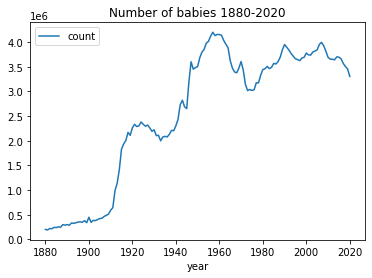

In [ ]:
dfplot1 = df1.groupby('year').sum()
dfplot1.plot(kind='line', title='Number of babies 1880-2020');

We can see that there was a spike of  over 4 million babies around 1960 and that the rate of babies have stayed at an average of about 3.5 million over the last two decades. Something interesting we can take a look at is first sectioning the data into three periods: 1880-1930 (steep rise in births), 1930-1970 (steady rise before peaking), 1970-2020 (a period of steady births). 

In [ ]:
d1p1 = df1[(df1['year'] >= 1880) & (df1['year'] <1930)] 
d1p2 = df1[(df1['year'] >= 1930) & (df1['year'] <1980)] 
d1p3 = df1[(df1['year'] >= 1980) & (df1['year'] <2020)] 

Now that we've created subsets of the data, we can now plot the most popular baby names for each time period and compare it to the most popular names over the whole period. 

In [ ]:
freqdf1 = df1.groupby(['name', 'sex']).sum().sort_values(by='count', ascending=False)
freqdf1 = freqdf1.drop("year", axis=1)
freqdf1 = freqdf1.reset_index(level=0)
freqdf1 = freqdf1.rename({"level_0": "name"}, axis=1)
freqdf1 = freqdf1.reset_index(level=0)
freqdf1 = freqdf1.rename({"level_0": "sex"}, axis=1)

In [ ]:
fem1 = freqdf1[freqdf1['sex']=='F'].sort_values(by="count",ascending=False)[:10]
male1= freqdf1[freqdf1['sex']=='M'].sort_values(by="count",ascending=False)[:10]

In [ ]:
fem1 #most popular female names throughout 1880-2020. 

,sex,name,count
5,F,Mary,4130314
13,F,Elizabeth,1653689
15,F,Patricia,1572554
17,F,Jennifer,1468730
19,F,Linda,1453408
20,F,Barbara,1435049
28,F,Margaret,1253426
32,F,Susan,1122251
33,F,Dorothy,1108769
34,F,Sarah,1084272


Let's plot the progression of the most common names for male and female babies over the years. 

In [ ]:
import plotly.express as px #import plotly express for plotting

We want to match the popular female baby names in our original dataset. We can do so by merging with the `merge` function. We merge the columns which match our `fem1` table based on name and sex. For this we use the `inner` join method. 

In [ ]:
fem_y = pd.merge(df1[df1['sex']== 'F'], fem1, left_on= ["name", "sex"], right_on = ["name", "sex"], how="inner")

In [ ]:
fig = px.line(fem_y,
              x="year",
              y="count_x", #count_x has the count for that year, count_y is the cumulative
              color = "name",
              labels = {"year" : "Year", # change x-axis label
                        "count_x" : "Babies",  # change y-axis label
                        "count" : "Count"},  # change legend title

              title = "Popular female names from 1880-2020"
             )
fig.show()

From this we can note a few things: 

1.   There was a spike in name usage of "Linda" in 1947 with 100k babies born that year named Linda. This trend has been noted by other researchers who point out the influence of a popular song by Jack Lawrence called "Linda," dedicated to 1-year-old Linda Eastman (who later became the wife of Paul McCartney).$^{1}$ 
2.   "Mary" was consistently the most popular name for baby girls born in the 1920s till the 1950s. The name suffered a decline from the 50s, indicating a deviation in "tradition". 
3.   The name "Jennifer" grew around the time Jennifer Jones made her first successful film in 1943. It spiked in popularity around the time a popular movie, _Love Story_, featured the untimely death of a Jennifer, as played by Ali MacGraw.$^{2}$ 


One thing this shows us is that the popular names in the past aren't popular names today. We can then analyze the popular names today and see the trend in popularity. 


In [ ]:
fem2 = d1p3[d1p3['sex']=='F'].sort_values(by="count",ascending=False)[:10]
d2p1 = d1p1.groupby('name').sum().sort_values(by='count', ascending=False)[:10]
d2p1 = d2p1.drop("year", axis=1)
d2p1 = d2p1.reset_index(level=0)
d2p1 = d2p1.rename({"level_0": "name"}, axis=1)
d2p1
fem2

,year,name,sex,count
0,1980,Jennifer,F,58379
0,1982,Jennifer,F,57119
0,1981,Jennifer,F,57049
0,1987,Jessica,F,55995
1,1987,Ashley,F,54853
0,1983,Jennifer,F,54348
0,1986,Jessica,F,52683
0,1988,Jessica,F,51546
0,1984,Jennifer,F,50560
1,1988,Ashley,F,49967


In [ ]:
fem_z = pd.merge(df1[df1['sex']== 'F'], fem2, left_on= ["name", "sex",], right_on = ["name", "sex",], how="inner")
fig = px.line(fem_z,
              x="year_x",
              y="count_x", #count_x has the count for that year, count_y is the cumulative
              color = "name",
              labels = {"year_x" : "Year", # change x-axis label
                        "count_x" : "Babies",  # change y-axis label
                        "count" : "Count"},  # change legend title

              title = "Popular female names from 1980-2020"
             )
fig.show()

The most popular name's in the last 50 years are Jennifer, Jessica, and Ashley. 

### **State-wide baby name popularity**

Another interesting thing to observe would be how the popularity of names differ accross staate. For this we can make use of the "State-wide Baby Names Data." Furthermroe, we can create an interactive and animated map of popular baby names to make it easier to compare.

First we create the state wide dataset.*italicized text*





In [ ]:
file_names_sta = glob.glob("/content/sample_data/baby_names_state/*.TXT") 
frames_sta = [pd.read_csv(f, names=["year", "name", "count"]) for f in file_names_sta]
df2 = pd.concat(frames_sta) 
df2 = df2.reset_index(level=0)
df2 = df2.rename({"level_0": "state"}, axis=1) #the data is sectioned by states
df2 = df2.reset_index(level=0)
df2 = df2.rename({"index": "sex"}, axis=1) #the data is sectioned by sex
df2

,sex,state,year,name,count
0,F,CA,1910,Mary,295
1,F,CA,1910,Helen,239
2,F,CA,1910,Dorothy,220
3,F,CA,1910,Margaret,163
4,F,CA,1910,Frances,134
...,...,...,...,...,...
6215829,M,FL,2020,Zacchaeus,5
6215830,M,FL,2020,Zacharias,5
6215831,M,FL,2020,Zavion,5
6215832,M,FL,2020,Zeppelin,5


Now we can define a function that plots the data in a choropleth so we can develop the interaction tool.

In [ ]:
def plot1(name, year):
  frame = df2[(df2['year']== year) & (df2['name']== name)] #dataframe for a given year and name that we can choose
  fig = px.choropleth(frame,
                    scope='usa',
                    locationmode="USA-states",
                    locations="state",
                    color="count",
                    color_continuous_scale= ["white", "plum"],
                    title="Popularity based on state"                    
                    )
  fig.show() #plots figure when the function is run

In [ ]:
from ipywidgets import interact, fixed #import the interactive widgets

Try entering a name from the following list to check how the popularity of the name grew over the years.

List of names to check: 

*   Girls: Mary, Jennifer, Ashley, Jessica, Elizabeth, Linda.

*  Boys: John, Jacob, Joseph, Mark, Peter, Noah.

In [ ]:
interact(plot1, name='Mary', year=(1880, 2020, 1)) #creating a starting point and defining the year slider for the timeframe of our data

interactive(children=(Text(value='Mary', description='name'), IntSlider(value=1950, description='year', max=20…

<function __main__.plot1>

We can also display the most popular names by state and animate this. 

In [ ]:
def plot2(gender):
  temp = df2[df2['sex']==gender]
  temp =  temp.loc[temp.groupby(["state", "year"])["count"].idxmax()] #group the data by state and year, return the max count for year and state

  #change color for different genders
  if gender == "M":
    color = ["white", "mediumseagreen"]
  elif gender == "F":
    color = ["white", "indigo"]
  fig = px.choropleth(temp,
                    scope='usa',
                    locationmode="USA-states",
                    locations="state",
                    color="count",
                    color_continuous_scale= color,
                    title="Popular names per state",
                    animation_frame='year',
                    hover_data= ['name'],
                    )
  fig.show();

In [ ]:
plot2('M')

Here's the animation for female babies:

In [ ]:
plot2('F')

### **Analyzing Unique Names**

We can next take a look at unique names. "Unique names" can be defined as occuring less than 1% of the total births in a year. 

In [ ]:
totals = df2.groupby('year')['count'].sum()
totals = totals.reset_index(level=0)
totals = totals.rename({"level_0": "year"})
df2 = pd.merge(df2, totals, left_on="year", right_on="year", how="outer")
df2['total births'] = (df2['count_x']/df2['count_y'])*100
df2

,sex,state,year,name,count_x,total births,count_y
0,F,CA,1910,Mary,295,0.057136,516313
1,F,CA,1910,Helen,239,0.046290,516313
2,F,CA,1910,Dorothy,220,0.042610,516313
3,F,CA,1910,Margaret,163,0.031570,516313
4,F,CA,1910,Frances,134,0.025953,516313
...,...,...,...,...,...,...,...
6215829,M,FL,2020,Zacchaeus,5,0.000181,2762898
6215830,M,FL,2020,Zacharias,5,0.000181,2762898
6215831,M,FL,2020,Zavion,5,0.000181,2762898
6215832,M,FL,2020,Zeppelin,5,0.000181,2762898


Here we can check what the percentage for some of the most common names have been: 

In [ ]:
df2.sort_values(by='total births', ascending=False)[:100]

,sex,state,year,name,count_x,total births,count_y
7146,F,PA,1910,Mary,2913,0.564193,516313
24350,F,PA,1911,Mary,3188,0.563428,565822
125902,F,PA,1915,Mary,7970,0.471598,1689998
95190,F,PA,1914,Mary,5981,0.462443,1293349
44280,F,PA,1912,Mary,4106,0.462386,888003
...,...,...,...,...,...,...,...
1296857,M,NY,1947,John,9637,0.281138,3427851
532347,F,PA,1926,Mary,6008,0.281086,2137423
884493,M,NY,1936,John,5421,0.279928,1936572
919041,M,NY,1937,John,5528,0.278191,1987123


From the 100 most common names, we can see that they range from 0.5% to 0.2% of the total births. Now, we can take a look at the least common names.

In [ ]:
df2.sort_values(by='total births', ascending=True)[:10]

,sex,state,year,name,count_x,total births,count_y
1773832,F,MI,1957,Patience,5,0.000125,4003109
1746771,F,TX,1957,Bobbye,5,0.000125,4003109
1746772,F,TX,1957,Bridgett,5,0.000125,4003109
1746773,F,TX,1957,Bridgette,5,0.000125,4003109
1746774,F,TX,1957,Bunny,5,0.000125,4003109
1746775,F,TX,1957,Caryl,5,0.000125,4003109
1746776,F,TX,1957,Catarina,5,0.000125,4003109
1746777,F,TX,1957,Cathi,5,0.000125,4003109
1746778,F,TX,1957,Cathrine,5,0.000125,4003109
1746779,F,TX,1957,Celestina,5,0.000125,4003109


Some of the least common names are Patience, Bobbye, Bridgett, Bridgette, Bunny, etc.. An interesting thing to note is how some of these names are deviations from more common forms (thus, are homophones). For example, "Bobbye" is spelt differently from its more common spelling of "Bobby". 

In [ ]:
df2[df2['name']=='Bobby'].max()

sex                    M
state                 WY
year                2020
name               Bobby
count_x             1079
total births    0.055408
count_y          4003109
dtype: object

Thus, we can see that "Bobby" as a name peaked in 2020 with 0.05% of all babies born that year with that name.

Now let us take a look at the 10 least common names and their progression over time. 

In [ ]:
df2.sort_values(by='total births', ascending=True)[:10]

,sex,state,year,name,count_x,total births,count_y
1773832,F,MI,1957,Patience,5,0.000125,4003109
1746771,F,TX,1957,Bobbye,5,0.000125,4003109
1746772,F,TX,1957,Bridgett,5,0.000125,4003109
1746773,F,TX,1957,Bridgette,5,0.000125,4003109
1746774,F,TX,1957,Bunny,5,0.000125,4003109
1746775,F,TX,1957,Caryl,5,0.000125,4003109
1746776,F,TX,1957,Catarina,5,0.000125,4003109
1746777,F,TX,1957,Cathi,5,0.000125,4003109
1746778,F,TX,1957,Cathrine,5,0.000125,4003109
1746779,F,TX,1957,Celestina,5,0.000125,4003109


In [ ]:
d = df2.sort_values(by='total births', ascending=True)[:10]
yd = pd.merge(df1, d, left_on= ["name"], right_on = ["name"], how="inner")
fig = px.line(yd,
              x="year_x",
              y="count", #count_x has the count for that year, count_y is the cumulative
              color = "name",
              labels = {"year" : "Year", # change x-axis label
                        "count_x" : "Babies",  # change y-axis label
                        "count" : "Count"},  # change legend title

              title = "Unique names from 1880-2020"
             )
fig.show()

Some of the most unique names of the past have grown in frequency of usage. We can further check what the most unique name of the last few decades are and plot those as well. 

In [ ]:
df2['recent'] = df2['year'] > 1980
d= df2[df2['recent']==True].sort_values(by='total births', ascending=True)[:10]

In [ ]:
yd = pd.merge(d1p3, d, left_on= ["name"], right_on = ["name"], how="inner")
fig = px.line(yd,
              x="year_x",
              y="count", #count_x has the count for that year, count_y is the cumulative
              color = "name",
              labels = {"year_x" : "Year", # change x-axis label
                        "count_x" : "Babies",  # change y-axis label
                        "count" : "Count"},  # change legend title

              title = "Unique names from 1880-2020"
             )
fig.show()

There is a huge variation in unique names in the last few decades with names like "Morgan" and "Shawn" oscilating between 10k and 1k and 3k and 30, respectively. 

Compared to popular names which have relatively stable trends and explainable peaks, unique names have a large variation and oscilate in and out of popular usage frequently. 

### **Conclusion**

In the end, we've taken a look at specific periods where names peaked and the potential motivations behind these peaks. This report has also created interactive tools to see how names vary by state over the years. Finally, we also analyzed some unique names and when they appear. The deviation from "traditional" names like Mary and towards more unique names stems from a trend to individualize and personalize names, aided by the growth in information through the age of the internet. Thus, we see more unique names in the last few decades than before that.  

### References 



1.   https://www.today.com/parents/linda-trendiest-baby-name-u-s-history-t120849 
2.   https://nationalpost.com/news/the-jennifer-epidemic-how-the-spiking-popularity-of-different-baby-names-cycle-like-genetic-drift 

